In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data =  pd.read_csv(r"C:\Users\SUMAN\Desktop\DS PROJECTS\EMAILS\emails.csv")
data

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...,...,...,...
48071,48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [3]:
list(data)

['Unnamed: 0', 'filename', 'Message-ID', 'content', 'Class']

In [4]:
data.shape

(48076, 5)

In [5]:
data.isnull().sum()

Unnamed: 0    0
filename      0
Message-ID    0
content       0
Class         0
dtype: int64

In [6]:
data.nunique()

Unnamed: 0    48076
filename      48076
Message-ID    48076
content       24656
Class             2
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  48076 non-null  int64 
 1   filename    48076 non-null  object
 2   Message-ID  48076 non-null  object
 3   content     48076 non-null  object
 4   Class       48076 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [9]:
data.describe()

,Unnamed: 0
count,48076.000000
mean,24037.500000
std,13878.490108
min,0.000000
25%,12018.750000
50%,24037.500000
75%,36056.250000
max,48075.000000


# Let's see the wordcloud of the content

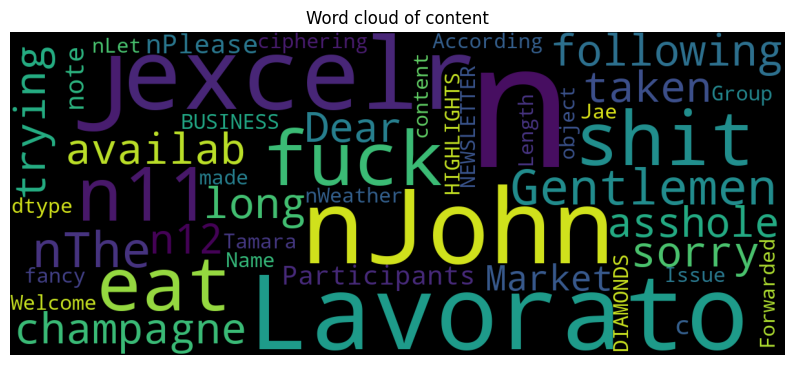

In [10]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='black',stopwords=stopwords,width=1200,height=500).generate(str(data['content']))
plt.rcParams['figure.figsize'] = (10,10)
plt.title("Word cloud of content")
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [11]:
class_count = data['Class'].value_counts()
print(class_count)

Class
Non Abusive    44666
Abusive         3410
Name: count, dtype: int64


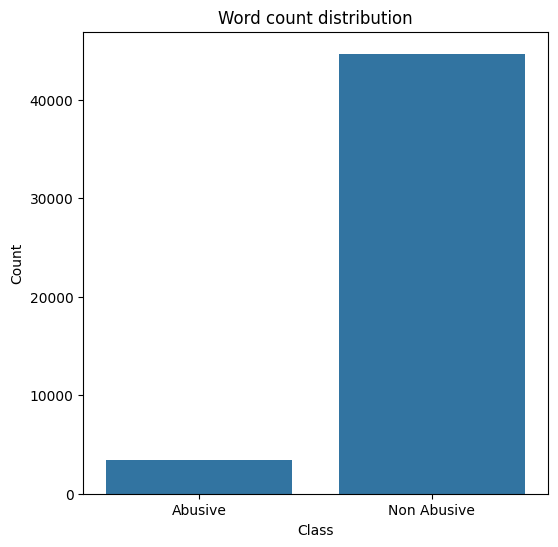

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(data=data, x='Class')
plt.title("Word count distribution")
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Using pie chart to reperesent the abusive and non-abusive class

In [13]:
print(class_count)

Class
Non Abusive    44666
Abusive         3410
Name: count, dtype: int64


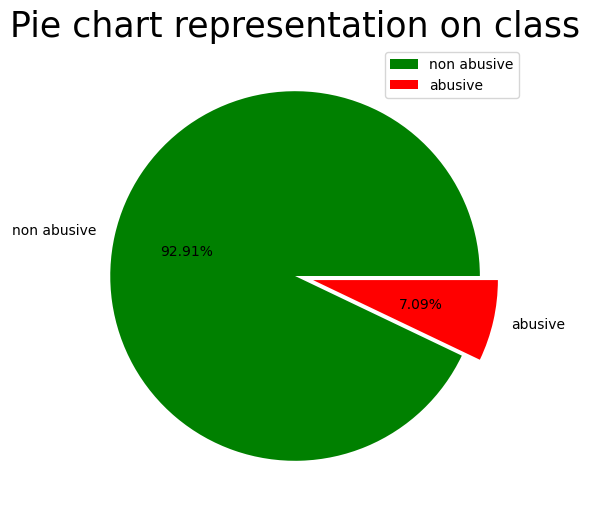

In [14]:
size = [44666,3410]
colors = ['green','red']
labels = 'non abusive', 'abusive'
explode = [0,0.1]

plt.figure(figsize=(6,6))
plt.pie(size, colors=colors, labels=labels, explode=explode,autopct= '%.2f%%')
plt.axis('off')
plt.title("Pie chart representation on class",fontsize = 25)
plt.legend()
plt.show()

In [15]:
df = data[data['Class'] == 'Abusive']
df

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...,...,...,...
3405,3405,zipper-a/sent_items/367.,<14695903.1075861170942.JavaMail.evans@thyme>,There is a lot of confused bullshit floating a...,Abusive
3406,3406,zipper-a/sent_items/37.,<6945064.1075842017346.JavaMail.evans@thyme>,"wow, three weeks away from the kids ! brave an...",Abusive
3407,3407,zipper-a/sent_items/382.,<1237276.1075861171270.JavaMail.evans@thyme>,\ngot this from late friday. have you ever hea...,Abusive
3408,3408,zufferli-j/deleted_items/109.,<30324039.1075842024203.JavaMail.evans@thyme>,"\n\n -----Original Message-----\nFrom: \t""Enge...",Abusive


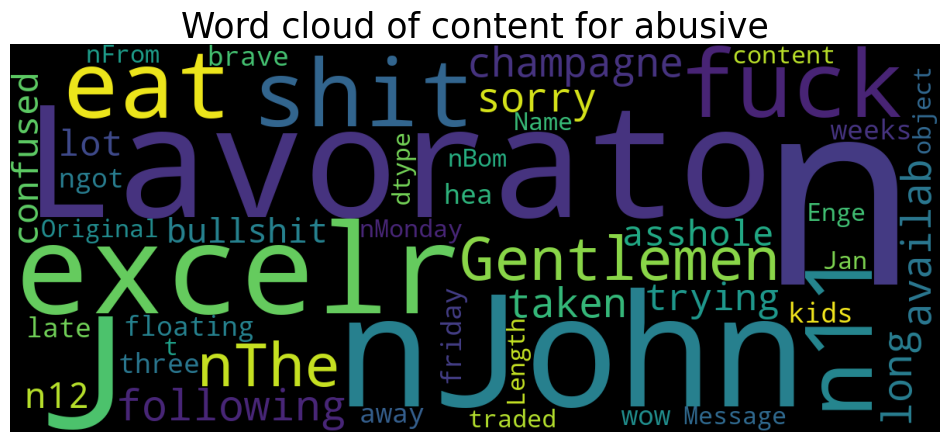

In [16]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color= 'black', stopwords=stopwords,width=1200, height=500).generate(str(df['content']))
plt.rcParams['figure.figsize'] = (12,8)
plt.title("Word cloud of content for abusive",fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [17]:
df1 = data[data['Class'] == 'Non Abusive']
df1

,Unnamed: 0,filename,Message-ID,content,Class
3410,3410,allen-p/_sent_mail/1.,<18782981.1075855378110.JavaMail.evans@thyme>,Here is our forecast\n\n,Non Abusive
3411,3411,allen-p/_sent_mail/10.,<15464986.1075855378456.JavaMail.evans@thyme>,Traveling to have a business meeting takes the...,Non Abusive
3412,3412,allen-p/_sent_mail/100.,<24216240.1075855687451.JavaMail.evans@thyme>,test successful. way to go!!!,Non Abusive
3413,3413,allen-p/_sent_mail/1000.,<13505866.1075863688222.JavaMail.evans@thyme>,"Randy,\n\n Can you send me a schedule of the s...",Non Abusive
3414,3414,allen-p/_sent_mail/1001.,<30922949.1075863688243.JavaMail.evans@thyme>,Let's shoot for Tuesday at 11:45.,Non Abusive
...,...,...,...,...,...
48071,48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


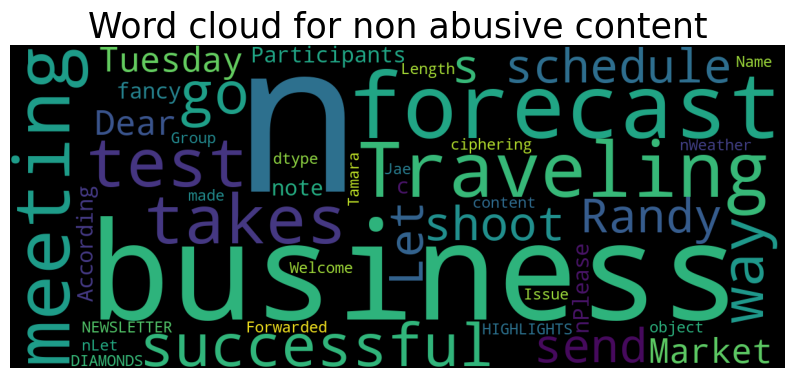

In [18]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='black',stopwords=stopwords,width=1200,height=500).generate(str(df1['content']))
plt.rcParams['figure.figsize'] = (10,10)
plt.title("Word cloud for non abusive content", fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

Checking the most common words in abusive class

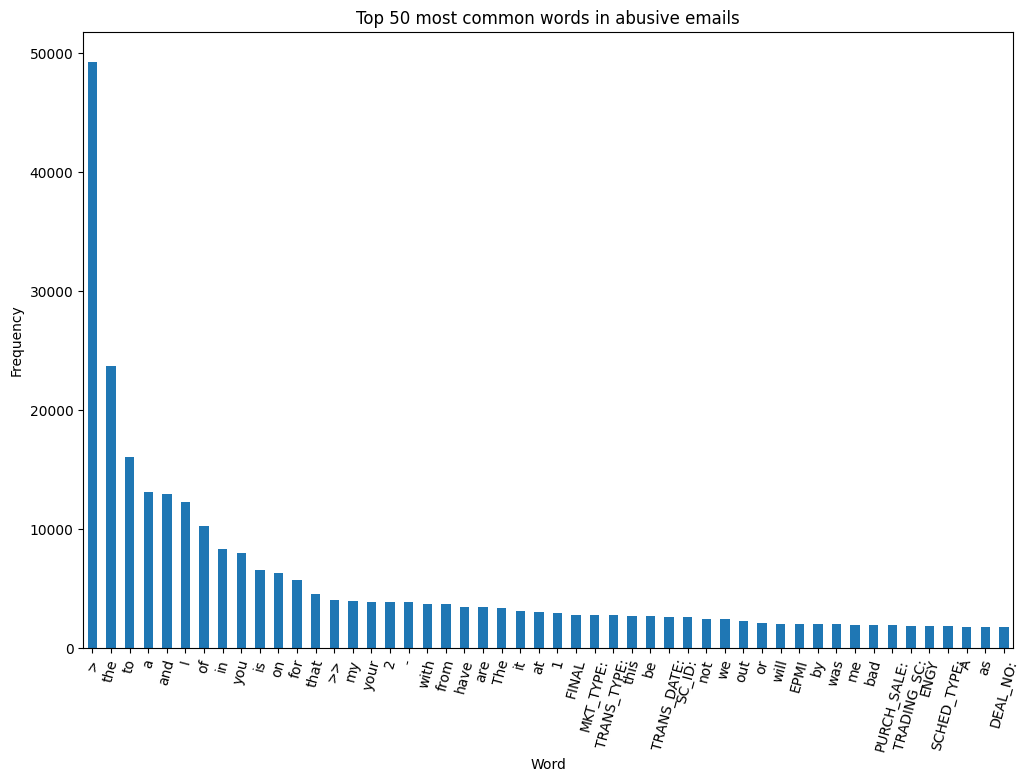

In [19]:
abusive_mails = data[data['Class'] == 'Abusive']
abusive_words = ' '.join(abusive_mails['content']).split()
abusive_words_freq = pd.Series(abusive_words).value_counts()
plt.figure(figsize=(12,8))
abusive_words_freq[:50].plot(kind='bar')
plt.title("Top 50 most common words in abusive emails")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=75)
plt.show()

Checking the most common words in Non-abusive class

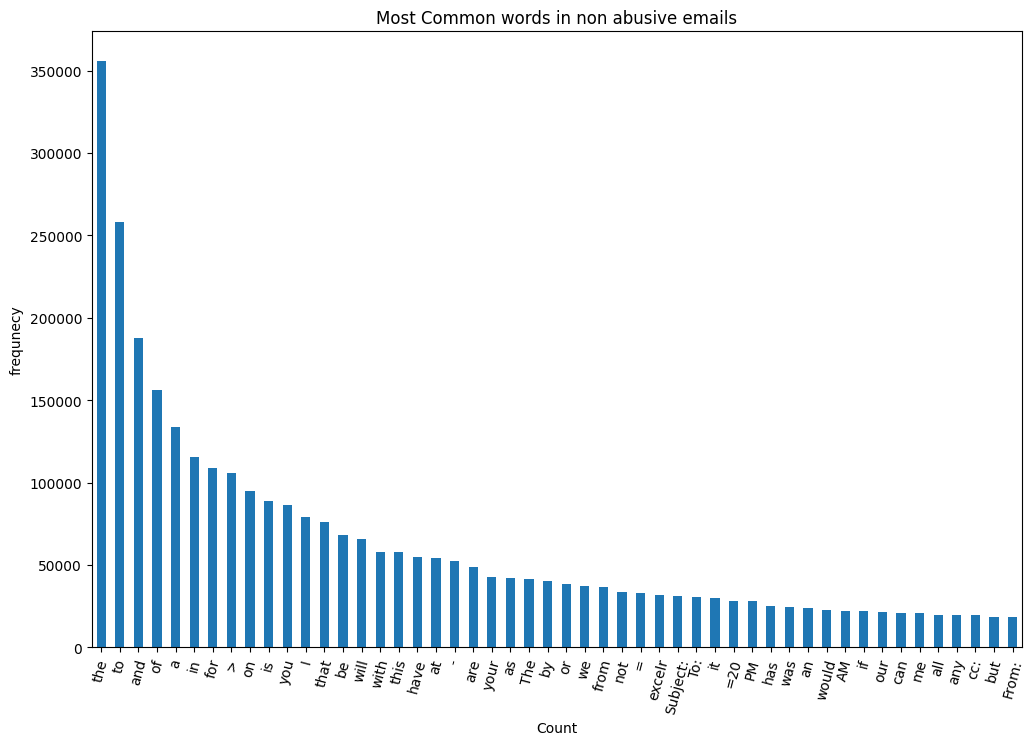

In [20]:
non_abusive_mails = data[data['Class'] == 'Non Abusive']
non_abusive_words = ' '.join(non_abusive_mails['content']).split()
non_abusive_words_freq = pd.Series(non_abusive_words).value_counts()
plt.figure(figsize=(12,8))
non_abusive_words_freq[:50].plot(kind='bar')
plt.title("Most Common words in non abusive emails")
plt.xlabel("Count")
plt.ylabel("frequnecy")
plt.xticks(rotation = 75)
plt.show()

In [21]:
data

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...,...,...,...
48071,48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [22]:
new = data.drop(['Unnamed: 0','filename','Message-ID'],axis=1)
new

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...
48071,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [23]:
new['content'][5]

'asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/24/2000 08:45 AM\nTo: John Arnold/HOU/ECT@ECT\ncc:  \nSubject: \n\nrams -3.5\nwash -7\nraiders -9 1/2\nbalt -5\nbears lions over 37\neagles bengals under 35 1/2\npats +4\nvikings +5.5\n\n\n'

In [24]:
new['content'][20]

'hey stupid:\ndo you know if jason ever signed an evergreen? if not, can you print one up?'

In [25]:
for i, col in enumerate(new.columns):
    if new[col].dtype == 'object':
        new.iloc[:,i] = new.iloc[:, i].str.replace('""','')
    else:
        new.iloc[:,i] = new.iloc[:, i].astype(str).str.replace('""', '')

In [26]:
new

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...
48071,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [27]:
import nltk
from nltk.corpus import stopwords

stop = stopwords.words('english')

In [28]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [30]:
print(porter.stem('dashingly'))
print(porter.stem('Very'))
print(porter.stem('December'))

dashingli
veri
decemb


In [31]:
print(lemmatizer.lemmatize('dashingly'))
print(lemmatizer.lemmatize('Very'))
print(lemmatizer.lemmatize('december'))
print(lemmatizer.lemmatize('troubled'))

dashingly
Very
december
troubled


In [32]:
from bs4 import BeautifulSoup
import re
import string

In [33]:
def content_words(raw_content):
    #removes html tags 
    content_text = BeautifulSoup(raw_content,'html.parser').get_text()

    #removes non-alphabetic characters
    letters_only =  re.sub('[^a-zA-Z]',' ',content_text)
    
    #converts the lowercasse
    words = letters_only.lower().split()
    
    # Stop words
    meaningful_words = [w for w in words if not w in stop]
    
    #lemmatization
    lemmatizing_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    return(' '.join(lemmatizing_words))

In [34]:
new['content_clean'] = new['content'].apply(content_words)
new

,content,Class,content_clean
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive,eat shit john j lavorato excelr pm john arnold...
1,fuck you,Abusive,fuck
2,Gentlemen:\nThe following champagne is availab...,Abusive,gentleman following champagne available approx...
3,sorry i've taken so long...just been trying to...,Abusive,sorry taken long trying fend chick life sooooo...
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive,asshole john j lavorato excelr john arnold hou...
...,...,...,...
48071,"Dear Market Participants,\n\nPlease note the c...",Non Abusive,dear market participant please note change pla...
48072,"According to my fancy ciphering we made $310,0...",Non Abusive,according fancy ciphering made month november ...
48073,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive,business highlight weather group let give big ...
48074,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive,welcome diamond newsletter issue special holid...


In [35]:
df2 = new[new['Class'] == 'Abusive']
df2

,content,Class,content_clean
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive,eat shit john j lavorato excelr pm john arnold...
1,fuck you,Abusive,fuck
2,Gentlemen:\nThe following champagne is availab...,Abusive,gentleman following champagne available approx...
3,sorry i've taken so long...just been trying to...,Abusive,sorry taken long trying fend chick life sooooo...
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive,asshole john j lavorato excelr john arnold hou...
...,...,...,...
3405,There is a lot of confused bullshit floating a...,Abusive,lot confused bullshit floating around
3406,"wow, three weeks away from the kids ! brave an...",Abusive,wow three week away kid brave lucky man life e...
3407,\ngot this from late friday. have you ever hea...,Abusive,got late friday ever heard original message je...
3408,"\n\n -----Original Message-----\nFrom: \t""Enge...",Abusive,original message engelhardt matthew excelr sen...


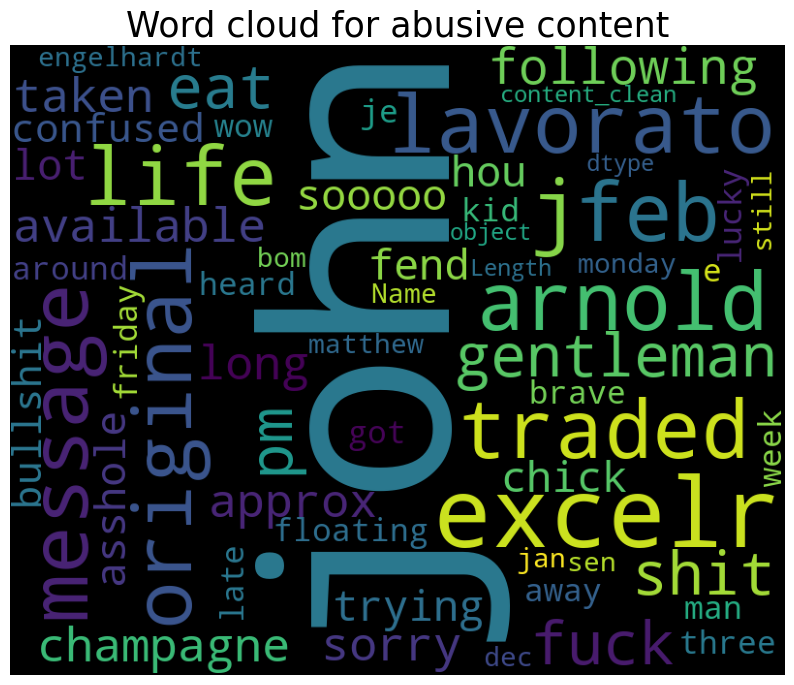

In [36]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='black',stopwords=stopwords,height=650,width=800).generate(str(df2['content_clean']))
plt.rcParams['figure.figsize'] = (10,10)
plt.title("Word cloud for abusive content",fontsize =25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [37]:
df3 = new[new['Class'] == 'Non Abusive']
df3

,content,Class,content_clean
3410,Here is our forecast\n\n,Non Abusive,forecast
3411,Traveling to have a business meeting takes the...,Non Abusive,traveling business meeting take fun trip espec...
3412,test successful. way to go!!!,Non Abusive,test successful way go
3413,"Randy,\n\n Can you send me a schedule of the s...",Non Abusive,randy send schedule salary level everyone sche...
3414,Let's shoot for Tuesday at 11:45.,Non Abusive,let shoot tuesday
...,...,...,...
48071,"Dear Market Participants,\n\nPlease note the c...",Non Abusive,dear market participant please note change pla...
48072,"According to my fancy ciphering we made $310,0...",Non Abusive,according fancy ciphering made month november ...
48073,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive,business highlight weather group let give big ...
48074,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive,welcome diamond newsletter issue special holid...


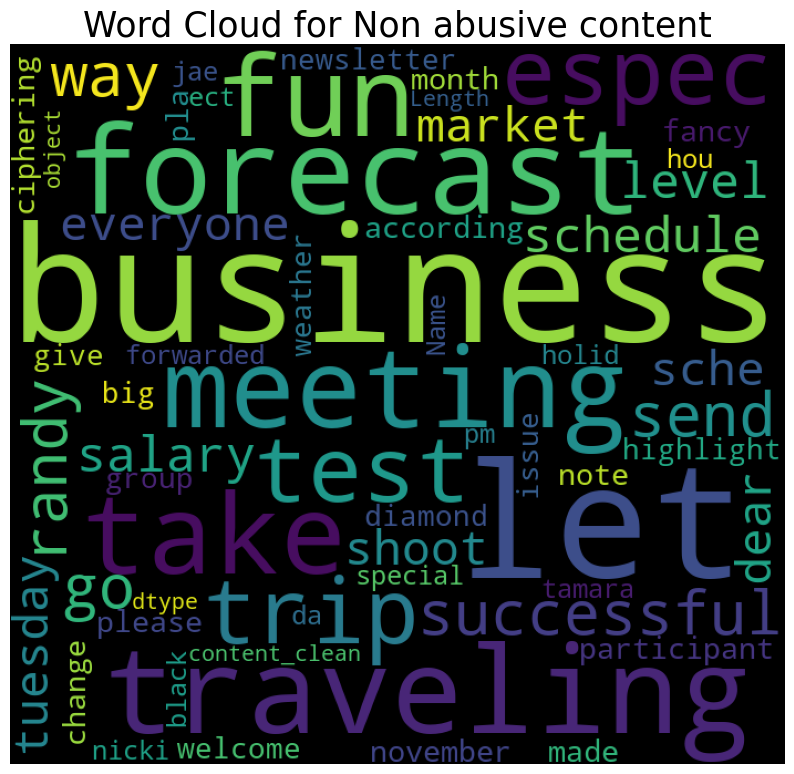

In [38]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='black',stopwords=stopwords,height=650,width= 700).generate(str(df3['content_clean']))
plt.rcParams['figure.figsize'] = (10,10)
plt.title("Word Cloud for Non abusive content",fontsize = 25)
print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Creating feature and target variable

In [39]:
X = new['content']
y = new['Class']

In [40]:
X.shape

(48076,)

In [41]:
y.shape

(48076,)

In [42]:
# stratify the proportions of all categories are maintained in both train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

In [43]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [44]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

Naive bayes 

Accuracy score : 0.971089850249584
Confusion matrix, without normalization


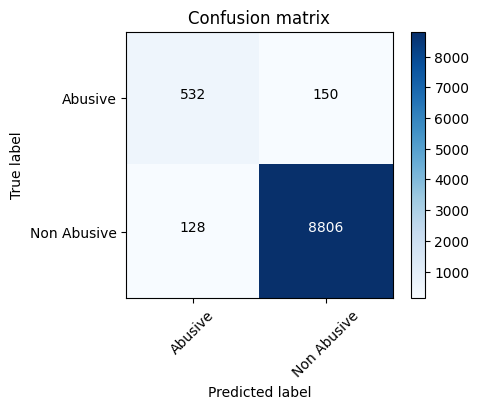

In [45]:
from sklearn.naive_bayes import MultinomialNB
import itertools
from sklearn import metrics
from sklearn.metrics import confusion_matrix

mnb =  MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy score :",score)
cm =  metrics.confusion_matrix(y_test,pred, labels=['Abusive','Non Abusive'])
class_names = ['Abusive', 'Non Abusive']
plt.figure(figsize=(5,4))
plot_confusion_matrix(cm, classes=class_names)

Passive aggresive classifier

The accuracy score using passive aggresive classifer : 0.9957362728785357
Confusion matrix, without normalization


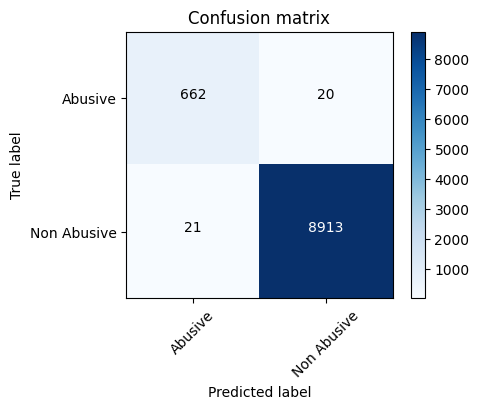

In [48]:
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression

passive =  PassiveAggressiveClassifier()
passive.fit(count_train,y_train)
passive_pred = passive.predict(count_test)
passive_score = metrics.accuracy_score(y_test,passive_pred)
print("The accuracy score using passive aggresive classifer :",passive_score)
cm = metrics.confusion_matrix(y_test,passive_pred, labels=['Abusive','Non Abusive'])
class_names = ['Abusive','Non Abusive']
plt.figure(figsize=(5,4))
plot_confusion_matrix(cm, classes=class_names)

Naive Bayes using Term frequency - Inverse Document Frequency

In [52]:
# Term Frequency - Inverse Document Frequency
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english',max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

The accuracy score using tfidf naivebayes :  0.9347961730449251
Confusion matrix, without normalization


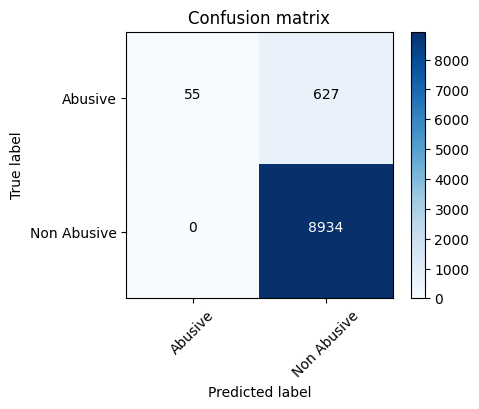

In [54]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train,y_train)
pred = mnb_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("The accuracy score using tfidf naivebayes : ", score)
cm = metrics.confusion_matrix(y_test,pred,labels=['Abusive','Non Abusive'])
class_names =  ['Abusive','Non Abusive']
plt.figure(figsize=(5,4))
plot_confusion_matrix(cm, classes = class_names)

The accuracy score using passive classifier with TFIDF : 0.9968801996672213
Confusion matrix, without normalization


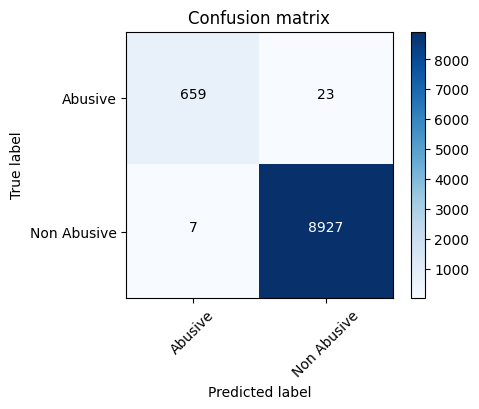

In [57]:
tfidf_vectorizer2 =  TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test2 = tfidf_vectorizer2.transform(X_test)

passive_tf = PassiveAggressiveClassifier()
passive_tf.fit(tfidf_train2,y_train)
passive_tf_pred = passive_tf.predict(tfidf_test2)
passive_tf_score = metrics.accuracy_score(y_test,passive_tf_pred)
print("The accuracy score using passive classifier with TFIDF :", passive_tf_score)
cm = metrics.confusion_matrix(y_test, passive_tf_pred, labels=['Abusive','Non Abusive'])
class_names = ['Abusive','Non Abusive']
plt.figure(figsize=(5,4))
plot_confusion_matrix(cm, classes=class_names)

## TFIDF: Bigrams

The accuracy score using tfidf bigrams : 0.9972961730449251
Confusion matrix, without normalization


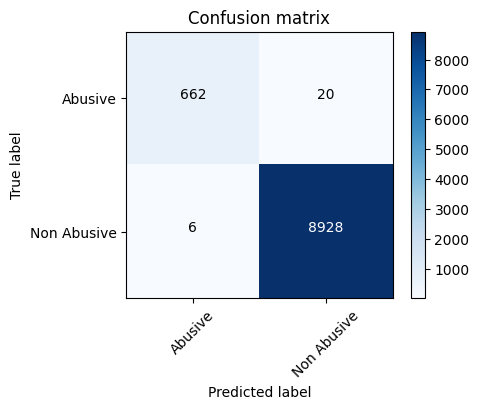

In [58]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english',max_df=0.8, ngram_range=(1,2))
tfidf_train3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test3 = tfidf_vectorizer3.transform(X_test)

passive_tf_bi = PassiveAggressiveClassifier()
passive_tf_bi.fit(tfidf_train3,y_train)
passive_tf_bi_pred = passive_tf_bi.predict(tfidf_test3)
passive_tf_bi_score = metrics.accuracy_score(y_test, passive_tf_bi_pred)
print("The accuracy score using tfidf bigrams :", passive_tf_bi_score)
cm = metrics.confusion_matrix(y_test, passive_tf_bi_pred, labels=['Abusive','Non Abusive'])
class_names = ['Abusive','Non Abusive']
plt.figure(figsize=(5,4))
plot_confusion_matrix(cm, classes=class_names)

 ## TFIDF: Trigrams

The accuracy score using trigram tfidf :  0.9965682196339434
Confusion matrix, without normalization


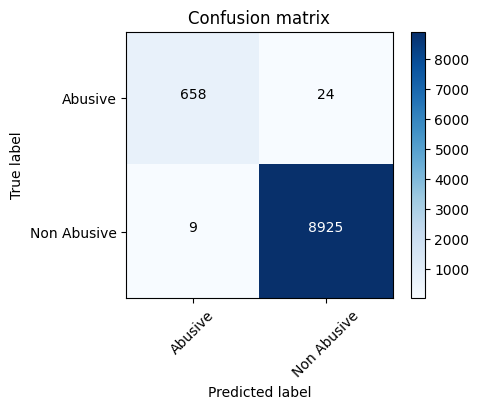

In [62]:
tfidf_vectorizer4 = TfidfVectorizer(stop_words='english',max_df=0.8, ngram_range=(1,3))
tfidf_train4 = tfidf_vectorizer4.fit_transform(X_train)
tfidf_test4 = tfidf_vectorizer4.transform(X_test)

passive_tf_tri = PassiveAggressiveClassifier()
passive_tf_tri.fit(tfidf_train4, y_train)
passive_tf_tri_pred = passive_tf_tri.predict(tfidf_test4)
passive_tf_tri_score = metrics.accuracy_score(y_test,passive_tf_tri_pred)
print("The accuracy score using trigram tfidf : ", passive_tf_tri_score)
cm = metrics.confusion_matrix(y_test, passive_tf_tri_pred, labels=['Abusive','Non Abusive'])
class_names = ['Abusive','Non Abusive']
plt.figure(figsize=(5,4))
plot_confusion_matrix(cm, classes=class_names)

In [69]:
data_accuracy = {"Model":['First_Model','Second_Model','Third_Model','fourth_model','fifth_Model','Sixth_Model'],
                 "Accuracy_score" : [score,passive_score,score,passive_tf_score,passive_tf_bi_score,passive_tf_tri_score]}

In [70]:
data_df = pd.DataFrame(data_accuracy)
data_df

,Model,Accuracy_score
0,First_Model,0.934796
1,Second_Model,0.995736
2,Third_Model,0.934796
3,fourth_model,0.996880
4,fifth_Model,0.997296
5,Sixth_Model,0.996568
